In [180]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# EPFL Machine Learning Higgs

TODO description

## 1. Load the training data into feature matrix, class labels, and event ids:

In [303]:
from proj1_helpers import *
from implementations import *
from cross_validation import *
from plots import *

In [283]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## 2. Data pre-processing

Before any attempt to prediction, we perform some data cleaning (TODO) and preprocessing. We start by standardising our training dataset.

In [327]:
tx = standardise(tX)
tx = normalise(tx)
# add constant term
tx = np.c_[np.ones(len(tX[:,0])), tx]
nb_features=tx.shape[1]
tx

array([[1.        , 0.51914948, 0.07485418, ..., 0.99675137, 0.99439501,
        0.06948372],
       [1.        , 0.52940358, 0.09965294, ..., 0.        , 0.        ,
        0.02829991],
       [1.        , 0.        , 0.23500634, ..., 0.        , 0.        ,
        0.0270908 ],
       ...,
       [1.        , 0.50408211, 0.08770931, ..., 0.        , 0.        ,
        0.02570782],
       [1.        , 0.49928709, 0.02805782, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.10543202, ..., 0.        , 0.        ,
        0.        ]])

In [184]:
w, loss = least_squares(y, tX)
print('Acc pour non standardisé:  {} '.format(compute_accuracy(w, y, tX)))
      
w, loss = least_squares(y, tx)
print('Acc pour standardisé:  {} '.format(compute_accuracy(w, y, tx)))

Acc pour non standardisé:  0.744328 
Acc pour standardisé:  0.718444 


In [185]:
# Test en splittant mass
w, loss = least_squares(y, new_tX)
print('Acc pour non standardisé:  {} '.format(compute_accuracy(w, y, new_tX)))

Acc pour non standardisé:  0.744408 


In [186]:
# Test en virant toutes les colonnes phi
tX_no_phi = np.delete(new_new_tX,[11, 15, 18, 20, 25, 28], axis = 1) 
w, loss = least_squares(y, tX_no_phi)
print('Acc pour non standardisé:  {} '.format(compute_accuracy(w, y, tX_no_phi)))

Acc pour non standardisé:  0.749872 


In [187]:
w, loss = least_squares(y, new_new_tX)
print('Acc pour non standardisé:  {} '.format(compute_accuracy(w, y, new_new_tX)))

Acc pour non standardisé:  0.74632 


In [188]:
tX_no_obv_phi = np.delete(new_tX, [15, 18, 20], axis = 1)
w, loss = least_squares(y, tX_no_obv_phi)
print('Acc pour non standardisé:  {} '.format(compute_accuracy(w, y, tX_no_obv_phi)))

Acc pour non standardisé:  0.744564 


In [189]:
w, loss = reg_logistic_regression(y, tx, lambda_=1, initial_w=np.random.rand(30), max_iters=50, gamma=0.1)

In [190]:
# Splitting the DER_mass_MMC col in two
shape = tX.shape
new_tX = np.zeros((shape[0], shape[1]+1))
new_tX[:,:-1] = tX
idx = (tX[:,0] == -999)
mass_999 = tX[:,0]*idx*(1/999)
new_tX[:,-1] = mass_999
new_tX[idx,0] = 0
new_tX

array([[ 138.47 ,   51.655,   97.827, ...,   -2.475,  113.497,    0.   ],
       [ 160.937,   68.768,  103.235, ..., -999.   ,   46.226,    0.   ],
       [   0.   ,  162.172,  125.953, ..., -999.   ,   44.251,   -1.   ],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   ,   41.992,    0.   ],
       [  94.951,   19.362,   68.812, ..., -999.   ,    0.   ,    0.   ],
       [   0.   ,   72.756,   70.831, ..., -999.   ,    0.   ,   -1.   ]])

In [191]:
new_shape = new_tX.shape
new_new_tX = np.zeros((new_shape[0], new_shape[1] + 1))
new_new_tX[:,:-1] = new_tX
new_idx = (new_tX[:,4] == -999)
lot_999 = new_tX[:,4]*new_idx*(1/999)
new_new_tX[:,-1] = lot_999
new_new_tX[new_idx, 4] = 0
new_new_tX[new_idx, 5] = 0
new_new_tX[new_idx, 6] = 0
new_new_tX[new_idx, 12] = 0
new_new_tX[new_idx, 26] = 0
new_new_tX[new_idx, 27] = 0
new_new_tX[new_idx, 28] = 0

## 3. Classic ML methods

The following predictions are made using the functions implemented during the course labs.

### 3.1 Least Squares GD

In [358]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.1

cross_validation(y, tx, compute_accuracy, 'least_squares_GD', k_fold=4, **kwargs)

(0.42201727893811036, 0.42177834799969777, 0.66482, 0.6649320000000001)

### 3.2 Least Squares SGD

In [360]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.001

cross_validation(y, tx, compute_accuracy, 'least_squares_SGD', k_fold=4, **kwargs)

(0.49049773159906307, 0.4899846431973478, 0.6499773333333333, 0.649364)

### 3.3 Least Squares, normal equations

In [319]:
#### testing answer

cross_validation(y, tx, compute_accuracy, 'least_squares', k_fold=4)

(0.3394279455899529, 0.3395703945520591, 0.7450106666666667, 0.744956)

### 3.4 Ridge Regression

#### 3.4.1 Algorithm

In [361]:
# Method parameters
kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['lambda_'] = 0.00011

cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, **kwargs)

(0.34649605780499027, 0.34656554763011965, 0.73242, 0.732304)

#### 3.4.2 Hyperparameter search: lambda

In order to improve our performance, we run an hyperparameter search on the regularisation parameter lambda.

0.0001

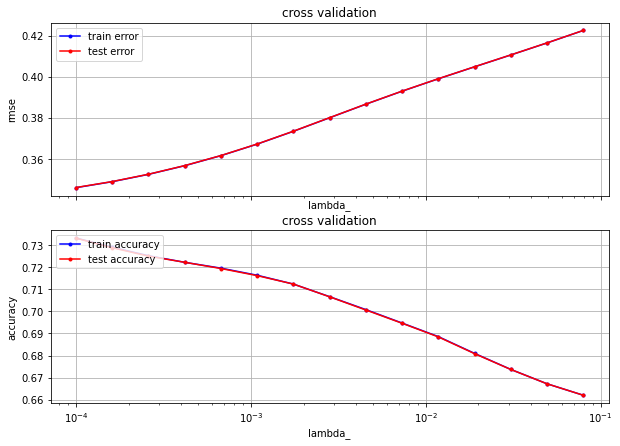

In [362]:
kwargs['initial_w'] = np.zeros(nb_features)
lambda_space = np.logspace(-4, -1.1, 15)
best_lambda = cross_validation_hyper_search(y, tx, 'lambda_', lambda_space , compute_accuracy, 'ridge_regression', 4, **kwargs)
best_lambda # TODO il essaie clairement de mettre lambda à 0

### 3.5 Logistic Regression

In [363]:
w, loss = logistic_regression(y_log_reg, tx, np.zeros(nb_features), 1000, 0.0001)
compute_accuracy_log_reg(w, y_log_reg, tx)

Current iteration=0, loss=173286.79513998624
Current iteration=100, loss=2338648.8861637013
Current iteration=200, loss=2276961.619465822
Current iteration=300, loss=2191796.772015711
Current iteration=400, loss=2122535.4571385663
Current iteration=500, loss=2055978.054843549
Current iteration=600, loss=1988225.269587835
Current iteration=700, loss=1919922.5117049431
Current iteration=800, loss=1852657.8761020135
Current iteration=900, loss=1786267.4344820832


0.48854

In [364]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 501
kwargs['gamma'] = 0.0000001

y_log_reg = (y+1)/2

cross_validation(y_log_reg, tx, compute_accuracy_log_reg, 'logistic_regression', k_fold=4, **kwargs)

Current iteration=0, loss=129965.09635498974
Current iteration=100, loss=121737.00480340105
Current iteration=200, loss=119642.74273967811
Current iteration=300, loss=118426.24878455502
Current iteration=400, loss=117608.72823320134
Current iteration=500, loss=116998.51203540864
Current iteration=0, loss=129965.09635498974
Current iteration=100, loss=121563.29374711326
Current iteration=200, loss=119469.65544923591
Current iteration=300, loss=118253.42488931536
Current iteration=400, loss=117435.04206482218
Current iteration=500, loss=116823.43257862428
Current iteration=0, loss=129965.09635498974
Current iteration=100, loss=121639.80684768772
Current iteration=200, loss=119543.49151974432
Current iteration=300, loss=118330.36549503304
Current iteration=400, loss=117517.38958891624
Current iteration=500, loss=116911.77920425996
Current iteration=0, loss=129965.09635498974
Current iteration=100, loss=121572.81548214747
Current iteration=200, loss=119455.9496244127
Current iteration=300,

(116876.63374451842, 38958.38647228767, 0.65818, 0.658196)

### 3.6 Penalized Logistic Regression

#### 3.6.1 Algorithm

In [366]:
#### testing answer

kwargs = {}
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 500
kwargs['gamma'] = 0.001
kwargs['lambda_'] = 0.01

y_log_reg = (y+1)/2

cross_validation(y_log_reg, tx, compute_accuracy_log_reg, 'reg_logistic_regression', k_fold=4, **kwargs)

(1828744.315836586, 561375.3776797091, 0.604984, 0.604224)

#### 3.6.2 Hyperparameter search: lambda

In order to improve our performance, we run an hyperparameter search on the regularisation parameter lambda.

0.00024709112279856045

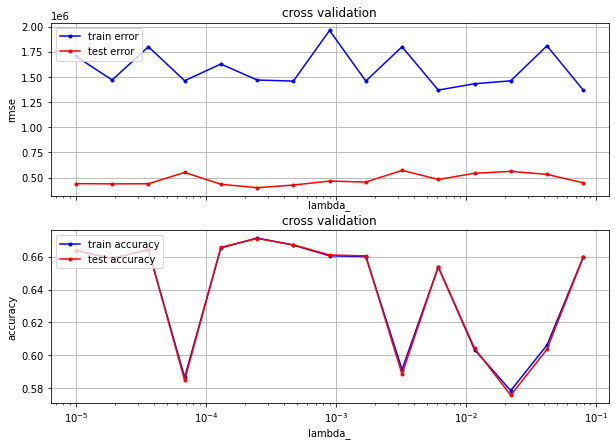

In [367]:
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.001
lambda_space = np.logspace(-5, -1.1, 15)
best_lambda = cross_validation_hyper_search(y_log_reg, tx, 'lambda_', lambda_space , compute_accuracy_log_reg, 'reg_logistic_regression', 4, **kwargs)
best_lambda 

/home/noyt/Desktop/MA1/ML_CS433/ML2020_PR1/proj1_helpers.py:85: RuntimeWarning: overflow encountered in exp
  ret = 1 / (1 + np.exp(-t))


5.179474679231212e-06

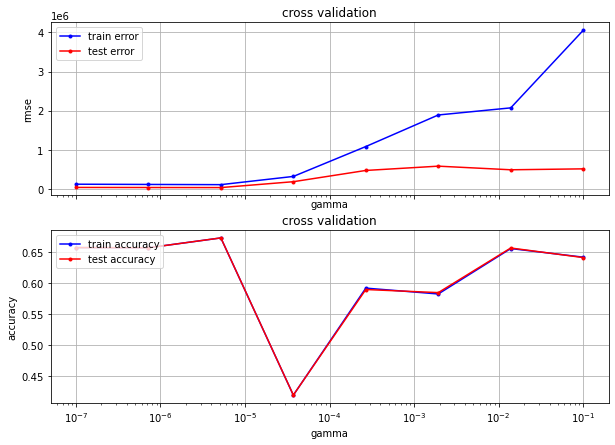

In [368]:
kwargs['initial_w'] = np.zeros(nb_features)
kwargs['max_iters'] = 50
kwargs['lambda'] = best_lambda
gamma_space = np.logspace(-7, -1, 8)
best_gamma = cross_validation_hyper_search(y_log_reg, tx, 'gamma', gamma_space , compute_accuracy_log_reg, 'reg_logistic_regression', 4, **kwargs)
best_gamma 

## Generate predictions and save ouput in csv format for submission:

In [142]:
DATA_TEST_PATH = 'data/test.csv'

# TODO standardise test data when required
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [27]:
OUTPUT_PATH = 'data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [47]:
compute_accuracy(w, y, new_tX)

0.636648

array([ 0.42412233,  0.42412233, -2.35781033, ...,  0.42412233,
        0.42412233, -2.35781033])